In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_BlueArchive_1.csv")
df.head()

,userName,score,at,content
0,Ipan Zarif,5,2024-06-01 17:02:49,Yah game nya udah bagus tapi kok gak ada terje...
1,Alex Ramadhan,5,2024-06-01 17:00:16,Untuk NEXON game Blue archive sudah bagus tapi...
2,Farel Maulana,1,2024-06-01 15:52:08,ko gak bisa di ewe :(
3,Raditya Ghilbran,5,2024-06-01 14:55:58,"Game nya bagus tapi maaf, saat story nya tamat..."
4,Amandaadi224 Adi,5,2024-06-01 13:11:55,Game bagus banget bang Nexon games😋😋


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Yah game nya udah bagus tapi kok gak ada terje...,Ipan Zarif,2024-06-01 17:02:49
1,Untuk NEXON game Blue archive sudah bagus tapi...,Alex Ramadhan,2024-06-01 17:00:16
2,ko gak bisa di ewe :(,Farel Maulana,2024-06-01 15:52:08
3,"Game nya bagus tapi maaf, saat story nya tamat...",Raditya Ghilbran,2024-06-01 14:55:58
4,Game bagus banget bang Nexon games😋😋,Amandaadi224 Adi,2024-06-01 13:11:55
...,...,...,...
791,Game ini sangat baik dermawan dan dapat anime,Kenzie Belva Fidelya,2024-05-01 00:28:05
792,👍,Saint,2024-05-01 00:19:30
793,"Mulai dari BGM, story, character, dan event ny...",Farhan_ 17,2024-04-30 23:44:49
794,Gamenya bagus dan story nya bagus dan anak ke-,Bangkutempe,2024-04-30 22:59:14


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   796 non-null    object
 1   userName  796 non-null    object
 2   at        796 non-null    object
dtypes: object(3)
memory usage: 18.8+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,796,796,796
unique,770,794,796
top,Bagus,Bangkutempe,2024-06-01 17:02:49
freq,8,2,1


# **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(796, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(770, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,yah game nya udah bagus tapi kok gak ada terje...,Ipan Zarif,2024-06-01 17:02:49
1,untuk nexon game blue archive sudah bagus tapi...,Alex Ramadhan,2024-06-01 17:00:16
2,ko gak bisa di ewe,Farel Maulana,2024-06-01 15:52:08
3,game nya bagus tapi maaf saat story nya tamat ...,Raditya Ghilbran,2024-06-01 14:55:58
4,game bagus banget bang nexon games,Amandaadi224 Adi,2024-06-01 13:11:55
...,...,...,...
790,game ini punya char dan cerita yg bagus,Azzka,2024-05-01 00:54:17
791,game ini sangat baik dermawan dan dapat anime,Kenzie Belva Fidelya,2024-05-01 00:28:05
793,mulai dari bgm story character dan event ny se...,Farhan_ 17,2024-04-30 23:44:49
794,gamenya bagus dan story nya bagus dan anak ke,Bangkutempe,2024-04-30 22:59:14


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,yah game nya udah bagus tapi kenapa tidak ada ...,Ipan Zarif,2024-06-01 17:02:49
1,untuk nexon game blue archive sudah bagus tapi...,Alex Ramadhan,2024-06-01 17:00:16
2,ko tidak bisa di ewe,Farel Maulana,2024-06-01 15:52:08
3,game nya bagus tapi maaf saat story nya tamat ...,Raditya Ghilbran,2024-06-01 14:55:58
4,game bagus banget bang nexon games,Amandaadi224 Adi,2024-06-01 13:11:55
...,...,...,...
790,game ini punya char dan cerita yang bagus,Azzka,2024-05-01 00:54:17
791,game ini sangat baik dermawan dan dapat anime,Kenzie Belva Fidelya,2024-05-01 00:28:05
793,mulai dari bgm story character dan event ny se...,Farhan_ 17,2024-04-30 23:44:49
794,gamenya bagus dan story nya bagus dan anak ke,Bangkutempe,2024-04-30 22:59:14


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,yah game nya udah bagus kenapa ada terjemahan ...,Ipan Zarif,2024-06-01 17:02:49
1,nexon game blue archive bagus ada atidak kuran...,Alex Ramadhan,2024-06-01 17:00:16
2,ko bisa ewe,Farel Maulana,2024-06-01 15:52:08
3,game nya bagus maaf story nya tamat langsung k...,Raditya Ghilbran,2024-06-01 14:55:58
4,game bagus banget bang nexon games,Amandaadi224 Adi,2024-06-01 13:11:55
...,...,...,...
790,game punya char cerita bagus,Azzka,2024-05-01 00:54:17
791,game sangat baik dermawan dapat anime,Kenzie Belva Fidelya,2024-05-01 00:28:05
793,mulai bgm story character event ny semua sanga...,Farhan_ 17,2024-04-30 23:44:49
794,gamenya bagus story nya bagus anak,Bangkutempe,2024-04-30 22:59:14


In [19]:
# 3. Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [yah, game, nya, udah, bagus, kenapa, ada, ter...
1      [nexon, game, blue, archive, bagus, ada, atida...
2                                        [ko, bisa, ewe]
3      [game, nya, bagus, maaf, story, nya, tamat, la...
4              [game, bagus, banget, bang, nexon, games]
                             ...                        
790                   [game, punya, char, cerita, bagus]
791         [game, sangat, baik, dermawan, dapat, anime]
793    [mulai, bgm, story, character, event, ny, semu...
794            [gamenya, bagus, story, nya, bagus, anak]
795                              [rate, gachanya, ampas]
Name: content, Length: 770, dtype: object

In [20]:
# 4. Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BlueArchive_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BlueArchive_1.csv', encoding = 'latin1')
df_clean

,content
0,yah game nya udah bagus kenapa ada terjemah ba...
1,nexon game blue archive bagus ada atidak kuran...
2,ko bisa ewe
3,game nya bagus maaf story nya tamat langsung k...
4,game bagus banget bang nexon games
...,...
765,game punya char cerita bagus
766,game sangat baik dermawan dapat anime
767,mulai bgm story character event ny semua sanga...
768,gamenya bagus story nya bagus anak


# **Translate**

In [22]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [24]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BlueArchive_1.csv', encoding='latin1')

In [25]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 4.72MB/s]                   


In [27]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,yah game nya udah bagus kenapa ada terjemah ba...
1,nexon game blue archive bagus ada atidak kuran...
2,ko bisa ewe
3,game nya bagus maaf story nya tamat langsung k...
4,game bagus banget bang nexon games
...,...
765,game punya char cerita bagus
766,game sangat baik dermawan dapat anime
767,mulai bgm story character event ny semua sanga...
768,gamenya bagus story nya bagus anak


In [28]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BlueArchive_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BlueArchive_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,yah game nya udah bagus kenapa ada terjemah ba...,"fontcolor="" # FFFF00""yesthegameisgood fontcolo..."
1,1,nexon game blue archive bagus ada atidak kuran...,The nexon game blue archive is good. There's n...
2,2,ko bisa ewe,ko can ewe
3,3,game nya bagus maaf story nya tamat langsung k...,It's a good game. I'm sorry the story ended. I...
4,4,game bagus banget bang nexon games,It's a great game. Bang nexon games.
...,...,...,...
765,765,game punya char cerita bagus,The game's got a good story char
766,766,game sangat baik dermawan dapat anime,The game is very good. The benefactor can be a...
767,767,mulai bgm story character event ny semua sanga...,How about the story character at Mrs.'s event?...
768,768,gamenya bagus story nya bagus anak,"It's a good game. It's a good story, kid."


# **Labeling**

In [46]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BlueArchive_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,yah game nya udah bagus kenapa ada terjemah ba...,"fontcolor="" # FFFF00""yesthegameisgood fontcolo..."
1,1,nexon game blue archive bagus ada atidak kuran...,The nexon game blue archive is good. There's n...
2,2,ko bisa ewe,ko can ewe
3,3,game nya bagus maaf story nya tamat langsung k...,It's a good game. I'm sorry the story ended. I...
4,4,game bagus banget bang nexon games,It's a great game. Bang nexon games.
...,...,...,...
765,765,game punya char cerita bagus,The game's got a good story char
766,766,game sangat baik dermawan dapat anime,The game is very good. The benefactor can be a...
767,767,mulai bgm story character event ny semua sanga...,How about the story character at Mrs.'s event?...
768,768,gamenya bagus story nya bagus anak,"It's a good game. It's a good story, kid."


In [47]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [48]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 388
Netral = 239
Negatif = 143

Total Data Seluruhnya : 770


In [50]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,yah game nya udah bagus kenapa ada terjemah ba...,"fontcolor="" # FFFF00""yesthegameisgood fontcolo...",Netral
1,1,nexon game blue archive bagus ada atidak kuran...,The nexon game blue archive is good. There's n...,Positif
2,2,ko bisa ewe,ko can ewe,Netral
3,3,game nya bagus maaf story nya tamat langsung k...,It's a good game. I'm sorry the story ended. I...,Positif
4,4,game bagus banget bang nexon games,It's a great game. Bang nexon games.,Positif
...,...,...,...,...
765,765,game punya char cerita bagus,The game's got a good story char,Positif
766,766,game sangat baik dermawan dapat anime,The game is very good. The benefactor can be a...,Positif
767,767,mulai bgm story character event ny semua sanga...,How about the story character at Mrs.'s event?...,Positif
768,768,gamenya bagus story nya bagus anak,"It's a good game. It's a good story, kid.",Positif


In [51]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,yah game nya udah bagus kenapa ada terjemah ba...,"fontcolor="" # FFFF00""yesthegameisgood fontcolo...",Netral
1,nexon game blue archive bagus ada atidak kuran...,The nexon game blue archive is good. There's n...,Positif
2,ko bisa ewe,ko can ewe,Netral
3,game nya bagus maaf story nya tamat langsung k...,It's a good game. I'm sorry the story ended. I...,Positif
4,game bagus banget bang nexon games,It's a great game. Bang nexon games.,Positif
...,...,...,...
765,game punya char cerita bagus,The game's got a good story char,Positif
766,game sangat baik dermawan dapat anime,The game is very good. The benefactor can be a...,Positif
767,mulai bgm story character event ny semua sanga...,How about the story character at Mrs.'s event?...,Positif
768,gamenya bagus story nya bagus anak,"It's a good game. It's a good story, kid.",Positif


# **Visualisasi**


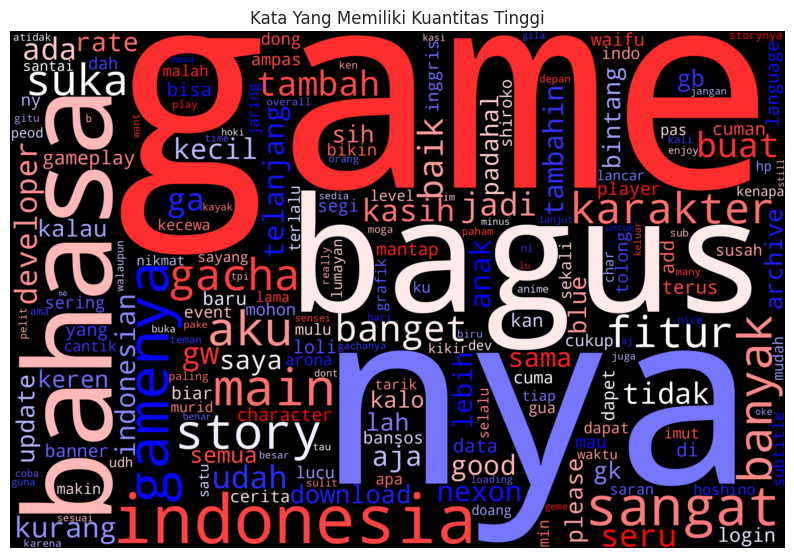

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


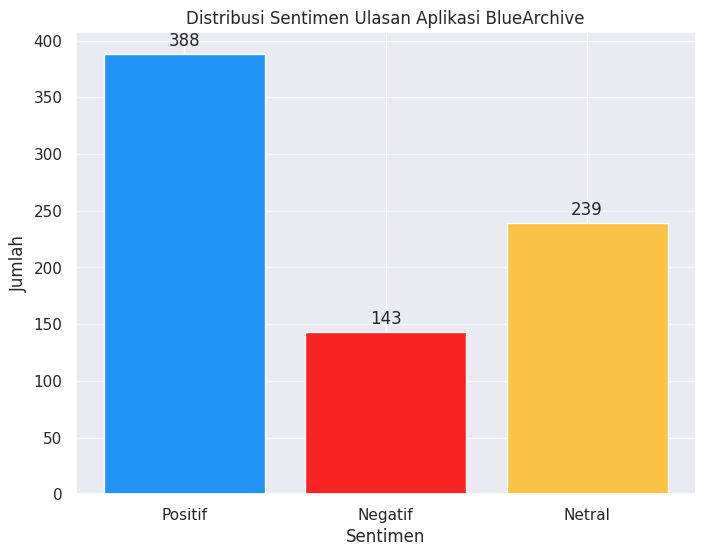

In [56]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BlueArchive")


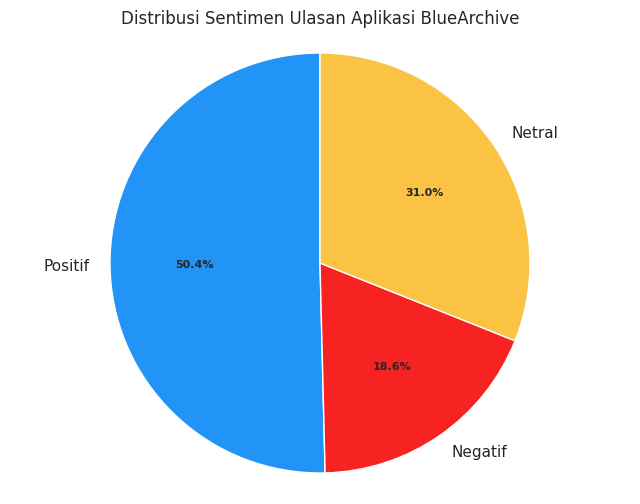

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BlueArchive")

In [58]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,nexon game blue archive bagus ada atidak kuran...,The nexon game blue archive is good. There's n...,Positif
3,game nya bagus maaf story nya tamat langsung k...,It's a good game. I'm sorry the story ended. I...,Positif
4,game bagus banget bang nexon games,It's a great game. Bang nexon games.,Positif
5,why are most of the children young what i want...,why are most of the children young what i want...,Positif
6,banyak karakter lucu,many funny characters,Positif
...,...,...,...
764,sungguh sayang ada fitur telanjang,It's too bad there's a nudity feature.,Negatif
765,game punya char cerita bagus,The game's got a good story char,Positif
766,game sangat baik dermawan dapat anime,The game is very good. The benefactor can be a...,Positif
767,mulai bgm story character event ny semua sanga...,How about the story character at Mrs.'s event?...,Positif


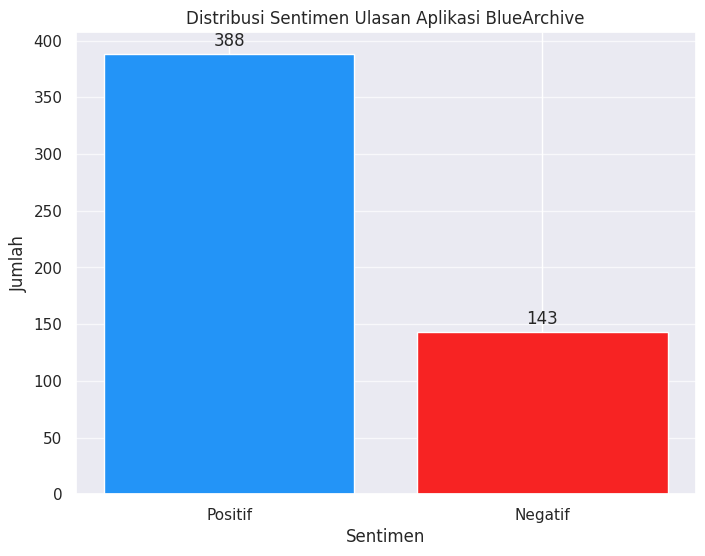

In [59]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BlueArchive")


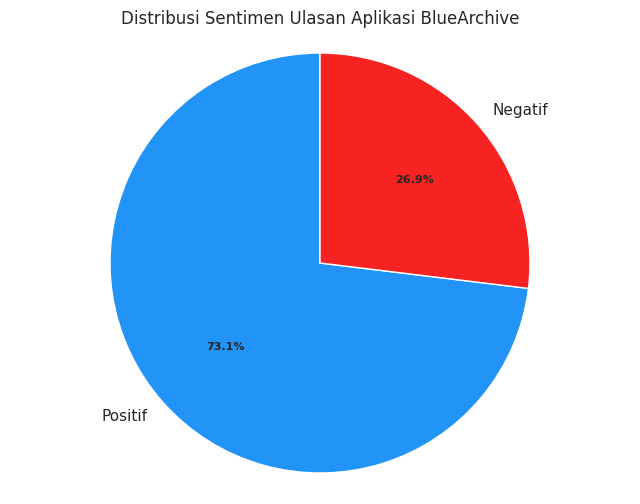

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BlueArchive")

In [61]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,nexon game blue archive bagus ada atidak kuran...,The nexon game blue archive is good. There's n...,1
3,game nya bagus maaf story nya tamat langsung k...,It's a good game. I'm sorry the story ended. I...,1
4,game bagus banget bang nexon games,It's a great game. Bang nexon games.,1
5,why are most of the children young what i want...,why are most of the children young what i want...,1
6,banyak karakter lucu,many funny characters,1
...,...,...,...
764,sungguh sayang ada fitur telanjang,It's too bad there's a nudity feature.,0
765,game punya char cerita bagus,The game's got a good story char,1
766,game sangat baik dermawan dapat anime,The game is very good. The benefactor can be a...,1
767,mulai bgm story character event ny semua sanga...,How about the story character at Mrs.'s event?...,1


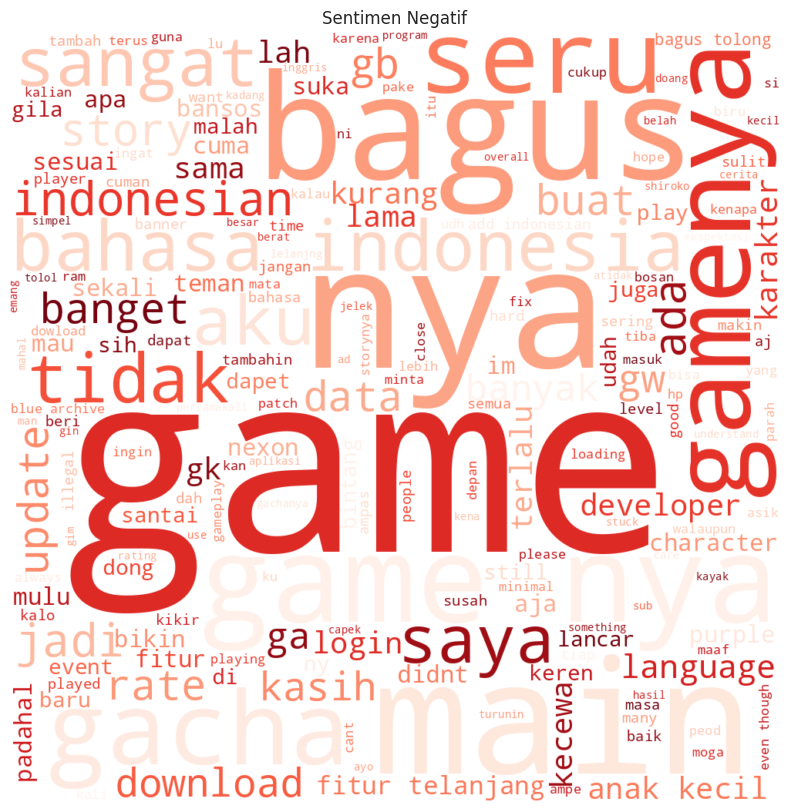

In [62]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

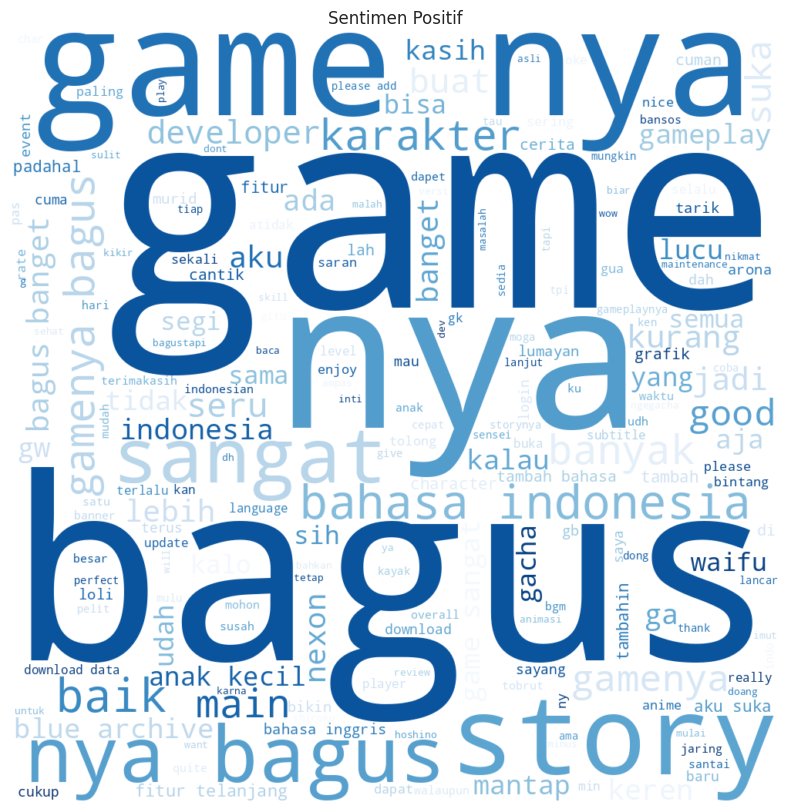

In [63]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [64]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
1    388
0    143
Name: count, dtype: int64

# **Data Preparation**

In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [67]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [68]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

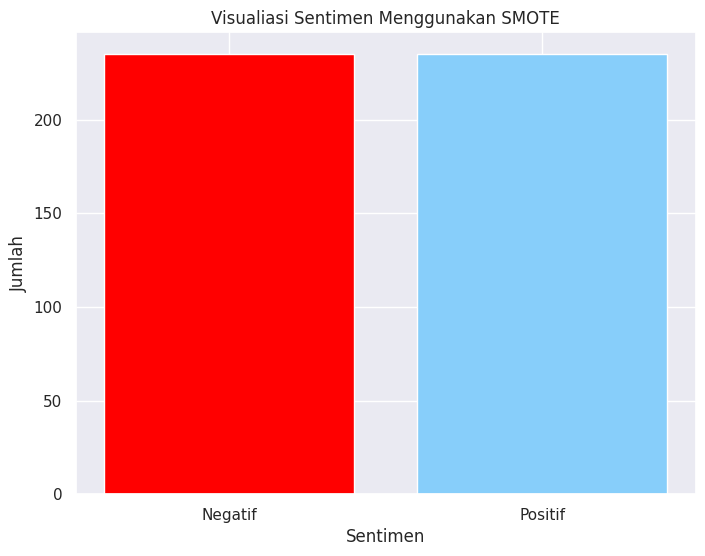

In [69]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue', 'orange'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [70]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [71]:
y_pred = naive_bayes.predict(X_test_vec)

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7230046948356808

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.51      0.45      0.48        60
     Positif       0.79      0.83      0.81       153

    accuracy                           0.72       213
   macro avg       0.65      0.64      0.64       213
weighted avg       0.71      0.72      0.72       213



In [74]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 27  33]
 [ 26 127]]

Accuracy =  0.7230046948356808


In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 27  33]
 [ 26 127]]

True Positives (TP) =  27

True Negatives (TN) =  127

False Positives (FP) =  33

False Negatives (FN) =  26

Accuracy =  0.7230046948356808


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

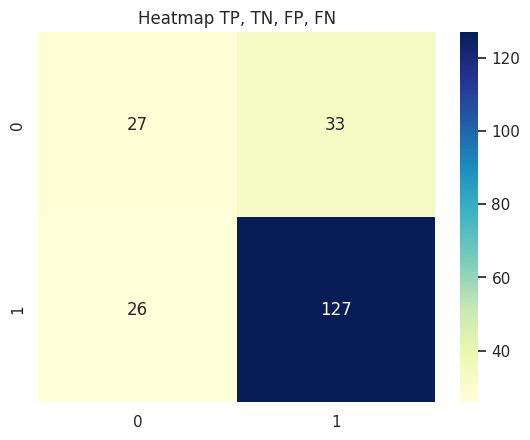

In [76]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1'],
                         index=['0', '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [77]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [78]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7230


In [79]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2770


# **Testing**


In [80]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus storynya
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 77.62%
Probabilitas: 77.61766538293415 %


In [82]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : jelek ngga bisa login
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 74.55%
Probabilitas: 74.5470112777083 %
